# Jaffle Shop Data Analysis - Final Project

## Instructions
You have been hired as a data analyst for Jaffle Shop, a growing chain of gourmet toasted sandwich restaurants. The executive team needs insights to make strategic business decisions.

Using the provided datasets and Python Polars, analyze the business performance and provide data-driven recommendations. You must use Polars for all data manipulation and analysis.

## Available Data
- `Customers.csv`: Customer information
- `Orders.csv`: Order transactions with totals and timestamps
- `Items.csv`: Individual items within each order
- `Products.csv`: Product catalog with prices and descriptions
- `Stores.csv`: Store locations and opening dates
- `Supplies.csv`: Supply costs for each product

**Time Limit: 90 minutes**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Setup and Data Loading

In [ ]:
# Import necessary libraries
import polars as pl
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Set up plotting style
plt.style.use('seaborn-v0_8-darkgrid')

In [ ]:
# Load all datasets
import os

file_paths = {
    'customers': 'drive/MyDrive/Customers.csv',
    'orders': 'drive/MyDrive/Orders.csv',
    'items': 'drive/MyDrive/Items.csv',
    'products': 'drive/MyDrive/Products.csv',
    'stores': 'drive/MyDrive/Stores.csv',
    'supplies': 'drive/MyDrive/Supplies.csv',
}

# Check if files exist before loading
for name, path in file_paths.items():
    if not os.path.exists(path):
        print(f"Error: File not found at {path}")
    else:
        print(f"File found: {path}")

# Load datasets if all files are found
try:
    customers = pl.read_csv(file_paths['customers'])
    orders = pl.read_csv(file_paths['orders'])
    items = pl.read_csv(file_paths['items'])
    products = pl.read_csv(file_paths['products'])
    stores = pl.read_csv(file_paths['stores'])
    supplies = pl.read_csv(file_paths['supplies'])

    # Display basic information about each dataset
    print("\nDataset shapes:")
    print(f"Customers: {customers.shape}")
    print(f"Orders: {orders.shape}")
    print(f"Items: {items.shape}")
    print(f"Products: {products.shape}")
    print(f"Stores: {stores.shape}")
    print(f"Supplies: {supplies.shape}")

except FileNotFoundError as e:
    print(f"\nFailed to load all datasets. Please check the file paths.")

File found: drive/MyDrive/Customers.csv
File found: drive/MyDrive/Orders.csv
File found: drive/MyDrive/Items.csv
File found: drive/MyDrive/Products.csv
File found: drive/MyDrive/Stores.csv
File found: drive/MyDrive/Supplies.csv

Dataset shapes:
Customers: (932, 2)
Orders: (63148, 7)
Items: (90184, 3)
Products: (10, 5)
Stores: (6, 4)
Supplies: (65, 5)


## Question 1: Revenue Performance Analysis

The CFO wants to understand the company's financial performance across different dimensions. Analyze:
- What is the total revenue generated by Jaffle Shop? (Store result in variable: `total_revenue`)
- How does revenue vary by store location? (Store result in variable: `revenue_by_store`)
- What are the monthly revenue trends? (Store result in variable: `monthly_revenue_trends`)
- Which day of the week generates the most revenue? (Store result in variable: `revenue_by_day_of_week`)
- Include at least one chart for one of these questions

In [ ]:
# Q1.1: Calculate total revenue
# Your code here

total_revenue = orders.select(pl.col('order_total')).sum()
print(total_revenue)

shape: (1, 1)
┌─────────────┐
│ order_total │
│ ---         │
│ i64         │
╞═════════════╡
│ 66038193    │
└─────────────┘


In [ ]:
# Q1.2: Revenue by store location
# Your code here

revenue_by_store= orders.join(stores, left_on='store_id', right_on='id').group_by('name').agg(pl.col('order_total').sum())
print(revenue_by_store)

shape: (2, 2)
┌──────────────┬─────────────┐
│ name         ┆ order_total │
│ ---          ┆ ---         │
│ str          ┆ i64         │
╞══════════════╪═════════════╡
│ Philadelphia ┆ 43215565    │
│ Brooklyn     ┆ 22822628    │
└──────────────┴─────────────┘


shape: (12, 3)
┌──────┬───────┬─────────────┐
│ year ┆ month ┆ order_total │
│ ---  ┆ ---   ┆ ---         │
│ i32  ┆ i8    ┆ i64         │
╞══════╪═══════╪═════════════╡
│ 2016 ┆ 9     ┆ 1644922     │
│ 2016 ┆ 10    ┆ 1956651     │
│ 2016 ┆ 11    ┆ 2552662     │
│ 2016 ┆ 12    ┆ 3307337     │
│ 2017 ┆ 1     ┆ 3821291     │
│ …    ┆ …     ┆ …           │
│ 2017 ┆ 4     ┆ 7392014     │
│ 2017 ┆ 5     ┆ 8469909     │
│ 2017 ┆ 6     ┆ 8617148     │
│ 2017 ┆ 7     ┆ 8585320     │
│ 2017 ┆ 8     ┆ 9332296     │
└──────┴───────┴─────────────┘


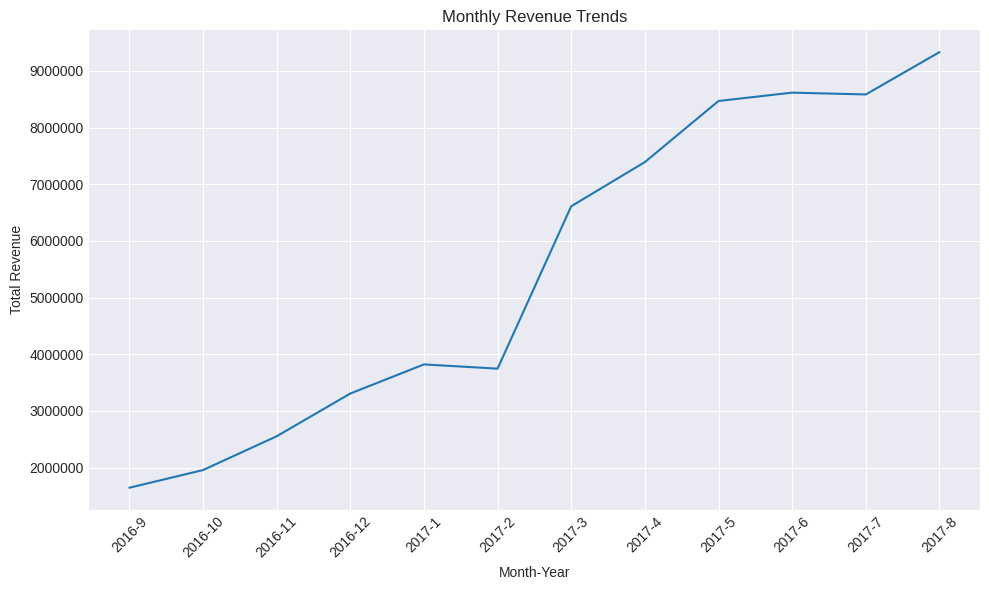

In [ ]:
# Q1.3: Monthly revenue trends
# Your code here

monthly_revenue_trends= orders.with_columns(pl.col('ordered_at').cast(pl.Datetime)).group_by(pl.col('ordered_at').dt.year().alias('year'), pl.col('ordered_at').dt.month().alias('month')).agg(pl.col('order_total').sum()).sort(['year', 'month'])
print(monthly_revenue_trends)

# Line chart for monthly revenue trends
_ax = monthly_revenue_trends.to_pandas()
_ax['month_year'] = _ax['year'].astype(str) + '-' + _ax['month'].astype(str)
plt.figure(figsize=(10, 6))
plt.plot(_ax['month_year'], _ax['order_total'])
plt.title('Monthly Revenue Trends')
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

shape: (7, 2)
┌─────────┬─────────────┐
│ weekday ┆ order_total │
│ ---     ┆ ---         │
│ i8      ┆ i64         │
╞═════════╪═════════════╡
│ 1       ┆ 10611971    │
│ 2       ┆ 10814455    │
│ 3       ┆ 10834569    │
│ 4       ┆ 10829195    │
│ 5       ┆ 10758715    │
│ 6       ┆ 5981489     │
│ 7       ┆ 6207799     │
└─────────┴─────────────┘


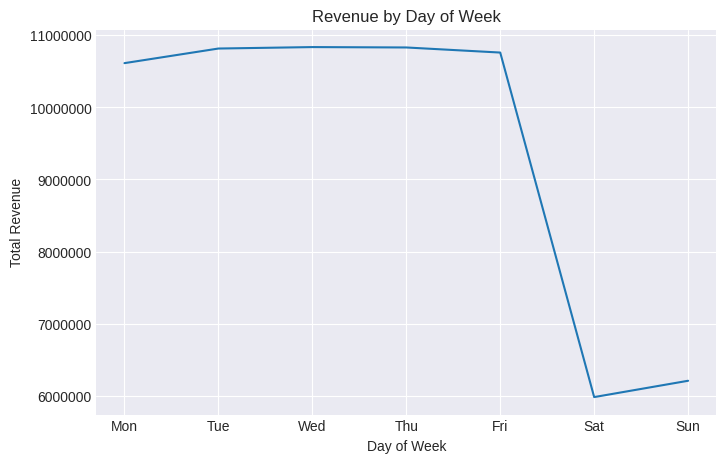

In [ ]:
# Q1.4: Revenue by day of week
# Your code here

revenue_by_day_of_week= orders.with_columns(pl.col('ordered_at').cast(pl.Datetime)).group_by(pl.col('ordered_at').dt.weekday().alias('weekday')).agg(pl.col('order_total').sum()).sort('weekday')
print(revenue_by_day_of_week)

# Bar chart for revenue by day of week
_ax = revenue_by_day_of_week.to_pandas()
plt.figure(figsize=(8, 5))
plt.plot(_ax['weekday'], _ax['order_total'])
plt.title('Revenue by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Revenue')
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ticklabel_format(style='plain', axis='y')
plt.show()

## Question 2: Product Performance

The Product Manager needs insights about the menu items:
- What is the revenue contribution of each product category (jaffles vs beverages)? (Store result in variable: `revenue_by_category`)
- What is the average price of products by type (jaffles vs beverages)?
- Include at least one chart to answer one of the above questions.

Revenue by product category:
shape: (2, 2)
┌──────────┬───────────────┐
│ type     ┆ total_revenue │
│ ---      ┆ ---           │
│ str      ┆ i64           │
╞══════════╪═══════════════╡
│ beverage ┆ 39836200      │
│ jaffle   ┆ 22880900      │
└──────────┴───────────────┘
shape: (2, 3)
┌──────────┬───────────────┬──────────────┐
│ type     ┆ total_revenue ┆ pct_of_total │
│ ---      ┆ ---           ┆ ---          │
│ str      ┆ i64           ┆ f64          │
╞══════════╪═══════════════╪══════════════╡
│ beverage ┆ 39836200      ┆ 63.52        │
│ jaffle   ┆ 22880900      ┆ 36.48        │
└──────────┴───────────────┴──────────────┘


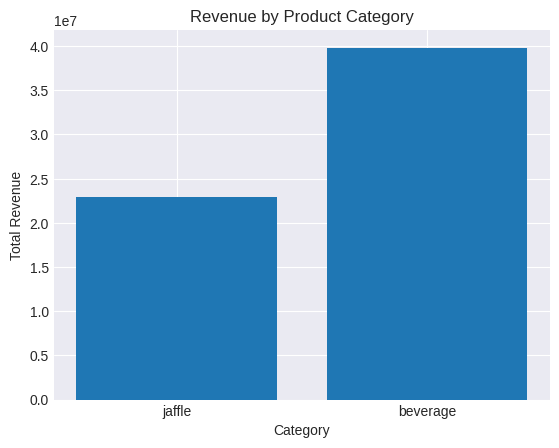

In [ ]:
# Q2.1: Revenue by product category

# ---- pick a join key between items and products ----
items_cols = set(items.columns)
products_cols = set(products.columns)

if "sku" in items_cols and "sku" in products_cols:
    left_key, right_key = "sku", "sku"
elif "product_id" in items_cols and "id" in products_cols:
    left_key, right_key = "product_id", "id"
elif "product_sku" in items_cols and "sku" in products_cols:
    left_key, right_key = "product_sku", "sku"
elif "product_name" in items_cols and "name" in products_cols:
    left_key, right_key = "product_name", "name"
else:
    raise ValueError(f"Couldn't find a common join key. items={items.columns}, products={products.columns}")

# ---- join to bring product metadata (e.g., type/category) onto line items ----
items_with_products = items.join(products, left_on=left_key, right_on=right_key, how="left")

# ---- quantity (default to 1 if missing) ----
qty_expr = pl.col("quantity") if "quantity" in items_cols else pl.lit(1)

# ---- choose price: prefer items.unit_price -> items.price -> products.price ----
if "unit_price" in items_cols:
    price_expr = pl.col("unit_price")
elif "price" in items_cols:
    price_expr = pl.col("price")
elif "price" in products_cols:
    price_expr = pl.col("price")  # from products after join
else:
    raise ValueError("No usable price column found in items or products.")

# ---- category column: prefer products.type then products.category ----
category_col = "type" if "type" in products_cols else ("category" if "category" in products_cols else None)
if category_col is None:
    raise ValueError(f"No category/type column found in products. Found: {products.columns}")

# ---- compute revenue by category ----
revenue_by_category = (
    items_with_products
    .with_columns((price_expr * qty_expr).alias("line_revenue"))
    .group_by(category_col)
    .agg(pl.col("line_revenue").sum().alias("total_revenue"))
    .sort("total_revenue", descending=True)
)

print("Revenue by product category:")
print(revenue_by_category)

# Add % of total and print
revenue_by_category = revenue_by_category.with_columns(
    (pl.col("total_revenue") / pl.col("total_revenue").sum() * 100)
    .round(2)
    .alias("pct_of_total")
)
print(revenue_by_category)

# Bar chart
_ax = revenue_by_category.sort("total_revenue").to_pandas()
plt.figure()
plt.bar(_ax["type"], _ax["total_revenue"])
plt.title("Revenue by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.show()



Average product price by type:
shape: (2, 2)
┌──────────┬───────────┐
│ type     ┆ avg_price │
│ ---      ┆ ---       │
│ str      ┆ f64       │
╞══════════╪═══════════╡
│ jaffle   ┆ 1200.0    │
│ beverage ┆ 560.0     │
└──────────┴───────────┘


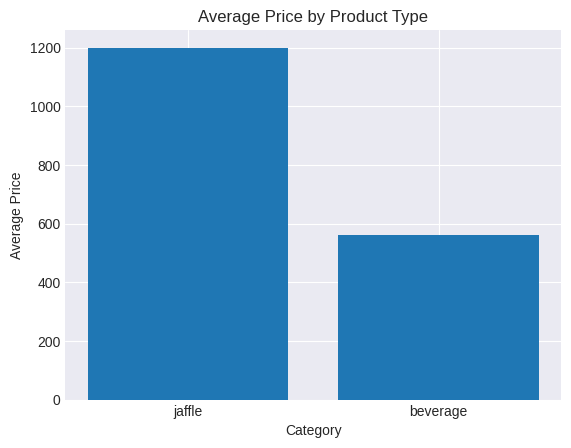

In [ ]:
# Q2.2: Average price of products by type

avg_price_by_category = (
    products
    .group_by("type")   # 'type' column holds product category (jaffles vs beverages)
    .agg(pl.col("price").mean().alias("avg_price"))
    .sort("avg_price", descending=True)
)

print("Average product price by type:")
print(avg_price_by_category)

# Optional bar chart
_ax = avg_price_by_category.to_pandas()
plt.figure()
plt.bar(_ax["type"], _ax["avg_price"])
plt.title("Average Price by Product Type")
plt.xlabel("Category")
plt.ylabel("Average Price")
plt.show()


## Question 3: Store Expansion Strategy

The Operations Director is planning expansion strategies:
- Which stores have the highest revenue per day since opening? (Store result in variable: `revenue_per_day_by_store`)
- What is the relationship between local tax rates and store performance? (Store result in variable: `tax_rate_performance`)
- Include at least one chart to answer one of the above questions.

Revenue per day since opening by store:
shape: (2, 6)
┌──────────────┬──────────────┬───────────────┬─────────────────┬─────────────┬─────────────────┐
│ name         ┆ opened_at    ┆ total_revenue ┆ last_order_date ┆ days_active ┆ revenue_per_day │
│ ---          ┆ ---          ┆ ---           ┆ ---             ┆ ---         ┆ ---             │
│ str          ┆ datetime[μs] ┆ i64           ┆ datetime[μs]    ┆ i64         ┆ f64             │
╞══════════════╪══════════════╪═══════════════╪═════════════════╪═════════════╪═════════════════╡
│ Brooklyn     ┆ 2017-03-12   ┆ 22822628      ┆ 2017-08-31      ┆ 172         ┆ 132689.697674   │
│              ┆ 00:00:00     ┆               ┆ 19:46:00        ┆             ┆                 │
│ Philadelphia ┆ 2016-09-01   ┆ 43215565      ┆ 2017-08-31      ┆ 364         ┆ 118724.07967    │
│              ┆ 00:00:00     ┆               ┆ 19:14:00        ┆             ┆                 │
└──────────────┴──────────────┴───────────────┴─────────────────

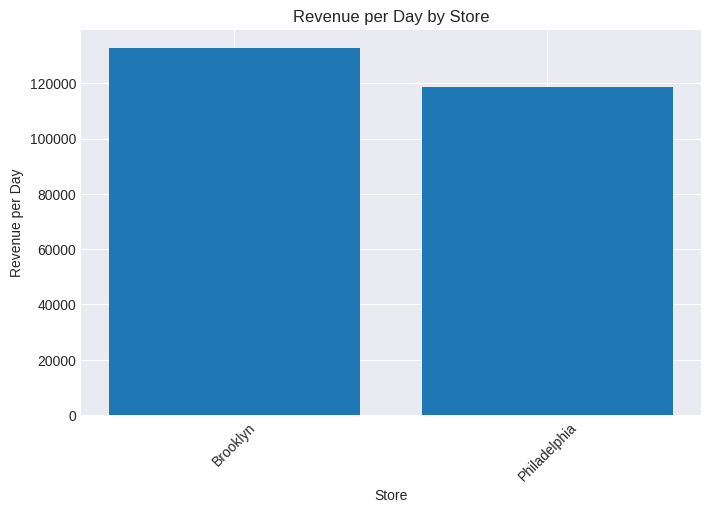

In [ ]:

from datetime import timedelta

# Q3.1: Revenue per day since opening by store

# Join orders with stores to get store opening dates and names
orders_with_stores = orders.join(stores, left_on="store_id", right_on="id", how="left")

# Ensure datetimes
orders_with_stores = orders_with_stores.with_columns([
    pl.col("ordered_at").cast(pl.Datetime),
    pl.col("opened_at").cast(pl.Datetime)
])

# Total revenue per store
revenue_per_store = (
    orders_with_stores
    .group_by("name", "opened_at")
    .agg(pl.col("order_total").sum().alias("total_revenue"))
)

# Last order date per store
last_order_per_store = (
    orders_with_stores
    .group_by("name")
    .agg(pl.col("ordered_at").max().alias("last_order_date"))
)

# Merge to calculate days active
revenue_per_store = revenue_per_store.join(last_order_per_store, on="name")

# Compute days active as integer
revenue_per_store = revenue_per_store.with_columns(
    ((pl.col("last_order_date") - pl.col("opened_at")) / timedelta(days=1))
    .cast(pl.Int64)
    .alias("days_active")
)

# Revenue per day
revenue_per_day_by_store = revenue_per_store.with_columns(
    (pl.col("total_revenue") / pl.col("days_active")).alias("revenue_per_day")
).sort("revenue_per_day", descending=True)

print("Revenue per day since opening by store:")
print(revenue_per_day_by_store)

# Optional chart
_ax = revenue_per_day_by_store.to_pandas()
plt.figure(figsize=(8,5))
plt.bar(_ax["name"], _ax["revenue_per_day"])
plt.title("Revenue per Day by Store")
plt.xlabel("Store")
plt.ylabel("Revenue per Day")
plt.xticks(rotation=45)
plt.show()




Tax rate vs performance table:
shape: (2, 3)
┌──────────────┬──────────┬─────────────────┐
│ name         ┆ tax_rate ┆ revenue_per_day │
│ ---          ┆ ---      ┆ ---             │
│ str          ┆ f64      ┆ f64             │
╞══════════════╪══════════╪═════════════════╡
│ Brooklyn     ┆ 0.04     ┆ 132689.697674   │
│ Philadelphia ┆ 0.06     ┆ 118724.07967    │
└──────────────┴──────────┴─────────────────┘

Pearson correlation (tax_rate vs revenue_per_day): -0.9999999999999998


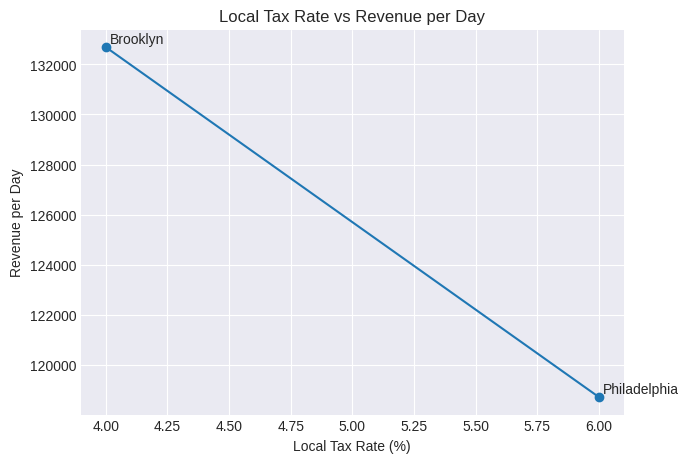

In [ ]:
# Q3.2: Tax rates vs store performance
# Q3.2: Tax rates vs store performance

import numpy as np
from math import isnan

# Join tax rate onto the revenue_per_day output from Q3.1
tax_rate_performance = (
    revenue_per_day_by_store
    .select(["name", "revenue_per_day"])
    .join(stores.select(["name", "tax_rate"]), on="name", how="left")
    .with_columns([
        pl.col("tax_rate").cast(pl.Float64),
        # Normalize: if tax_rate <= 1 assume it's a fraction (e.g., 0.085); else assume it's percent (e.g., 8.5)
        pl.when(pl.col("tax_rate") <= 1)
          .then(pl.col("tax_rate"))
          .otherwise(pl.col("tax_rate") / 100)
          .alias("tax_rate_norm")
    ])
    .drop_nulls(["tax_rate_norm"])
    .select([
        "name",
        pl.col("tax_rate_norm").alias("tax_rate"),  # in fraction form (e.g., 0.085)
        "revenue_per_day"
    ])
)

print("Tax rate vs performance table:")
print(tax_rate_performance)

# Pearson correlation between tax rate and revenue/day
corr = tax_rate_performance.select(
    pl.corr("tax_rate", "revenue_per_day").alias("pearson_corr")
).item()
print(f"\nPearson correlation (tax_rate vs revenue_per_day): {corr}")

# Scatter plot with best-fit line
_ax = tax_rate_performance.with_columns(
    (pl.col("tax_rate") * 100).alias("tax_rate_pct")
).to_pandas()

plt.figure(figsize=(7,5))
plt.scatter(_ax["tax_rate_pct"], _ax["revenue_per_day"])
for _, row in _ax.iterrows():
    plt.annotate(row["name"], (row["tax_rate_pct"], row["revenue_per_day"]),
                 xytext=(3,3), textcoords="offset points")

# Add simple linear trendline (only if we have 2+ stores)
if len(_ax) >= 2:
    m, b = np.polyfit(_ax["tax_rate_pct"], _ax["revenue_per_day"], 1)
    xs = np.linspace(_ax["tax_rate_pct"].min(), _ax["tax_rate_pct"].max(), 100)
    plt.plot(xs, m * xs + b)

plt.title("Local Tax Rate vs Revenue per Day")
plt.xlabel("Local Tax Rate (%)")
plt.ylabel("Revenue per Day")
plt.show()



## Question 4: Customer Behavior Analysis

The Marketing Manager wants to understand customer patterns:
- What is the distribution of order values? (Store result in variable: `order_value_distribution`)
- How many customers are repeat customers? (Store result in variable: `repeat_customer_analysis`)
- Which customers contribute the most to revenue? (Store result in variable: `top_revenue_customers`)

Summary statistics of order values:
shape: (9, 2)
┌────────────┬─────────────┐
│ statistic  ┆ order_total │
│ ---        ┆ ---         │
│ str        ┆ f64         │
╞════════════╪═════════════╡
│ count      ┆ 63148.0     │
│ null_count ┆ 0.0         │
│ mean       ┆ 1045.76856  │
│ std        ┆ 1025.930713 │
│ min        ┆ 0.0         │
│ 25%        ┆ 530.0       │
│ 50%        ┆ 636.0       │
│ 75%        ┆ 1165.0      │
│ max        ┆ 10281.0     │
└────────────┴─────────────┘


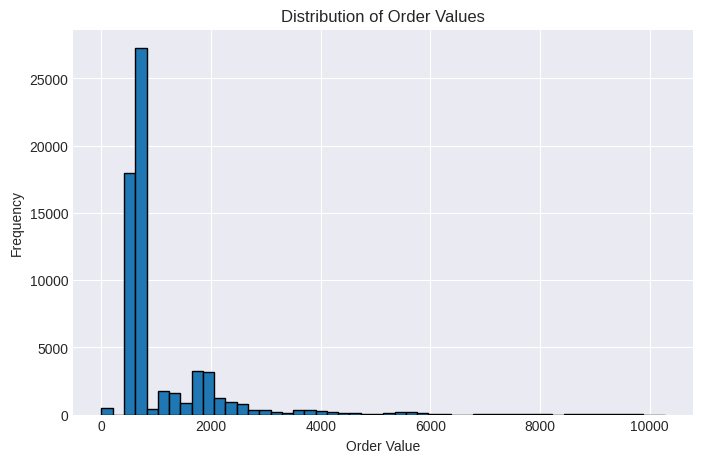

In [ ]:
# Q4.1: Distribution of order values

# Use the 'orders' dataset directly (order_total column)
order_value_distribution = orders.select("order_total")

print("Summary statistics of order values:")
print(order_value_distribution.describe())

# Plot histogram of order values
plt.figure(figsize=(8,5))
plt.hist(order_value_distribution.to_pandas()["order_total"], bins=50, edgecolor="black")
plt.title("Distribution of Order Values")
plt.xlabel("Order Value")
plt.ylabel("Frequency")
plt.show()


Repeat customer analysis:
shape: (1, 5)
┌─────────────────┬──────────────────┬────────────────────┬────────────────────┬───────────────────┐
│ total_customers ┆ repeat_customers ┆ one_time_customers ┆ pct_repeat_custome ┆ pct_one_time_cust │
│ ---             ┆ ---              ┆ ---                ┆ rs                 ┆ omers             │
│ u32             ┆ i64              ┆ i64                ┆ ---                ┆ ---               │
│                 ┆                  ┆                    ┆ f64                ┆ f64               │
╞═════════════════╪══════════════════╪════════════════════╪════════════════════╪═══════════════════╡
│ 930             ┆ 920              ┆ 10                 ┆ 98.92              ┆ 1.08              │
└─────────────────┴──────────────────┴────────────────────┴────────────────────┴───────────────────┘


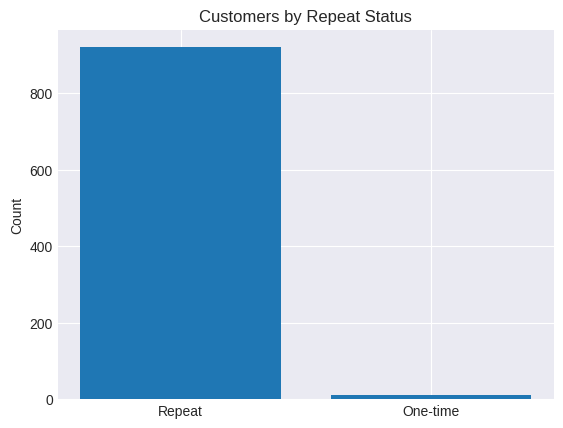

In [ ]:
# Q4.2: Repeat customers analysis

# pick the customer id column present in your 'orders' table
orders_cols = set(orders.columns)
if "customer_id" in orders_cols:
    customer_col = "customer_id"
elif "customer" in orders_cols:
    customer_col = "customer"
else:
    raise ValueError(f"No customer column found in orders. Columns: {orders.columns}")

# orders per customer
customer_order_counts = (
    orders
    .select(pl.col(customer_col))
    .group_by(customer_col)
    .agg(pl.len().alias("order_count"))
)

# build flags and aggregate
repeat_customer_analysis = (
    customer_order_counts
    .with_columns([
        (pl.col("order_count") > 1).cast(pl.Int64).alias("is_repeat"),
        (pl.col("order_count") == 1).cast(pl.Int64).alias("is_one_time"),
    ])
    .select([
        pl.len().alias("total_customers"),
        pl.col("is_repeat").sum().alias("repeat_customers"),
        pl.col("is_one_time").sum().alias("one_time_customers"),
    ])
    .with_columns([
        (pl.col("repeat_customers") / pl.col("total_customers") * 100).round(2).alias("pct_repeat_customers"),
        (pl.col("one_time_customers") / pl.col("total_customers") * 100).round(2).alias("pct_one_time_customers"),
    ])
)

print("Repeat customer analysis:")
print(repeat_customer_analysis)

_ax = repeat_customer_analysis.to_pandas().iloc[0]
plt.figure()
plt.bar(["Repeat", "One-time"], [_ax["repeat_customers"], _ax["one_time_customers"]])
plt.title("Customers by Repeat Status")
plt.ylabel("Count")
plt.show()



Top revenue contributing customers:
shape: (10, 3)
┌─────────────────────────────────┬───────────────┬──────────────────────┐
│ customer                        ┆ total_revenue ┆ name                 │
│ ---                             ┆ ---           ┆ ---                  │
│ str                             ┆ i64           ┆ str                  │
╞═════════════════════════════════╪═══════════════╪══════════════════════╡
│ ea3ada4c-8ffa-4e73-a51f-27711f… ┆ 262647        ┆ David Leonard        │
│ 4fb3b92c-29cc-410f-a898-9784c4… ┆ 259037        ┆ Jesse Moore          │
│ 99facd33-7b11-4955-aa0d-ccd118… ┆ 258515        ┆ Diane Davis          │
│ 8bbf796d-0862-41c6-b533-38d6c2… ┆ 252703        ┆ Holly Johnson        │
│ bc94ad77-6703-48d9-85d9-7908e7… ┆ 249821        ┆ Gregory Hayes        │
│ 3ddc958e-73f5-4fe9-804e-d63c8b… ┆ 247510        ┆ Julie Robinson       │
│ 0b92fd92-9200-47fe-9b57-9ada88… ┆ 246325        ┆ Christopher Robinson │
│ a54f0762-0ac2-4821-bb45-835fd4… ┆ 244102       

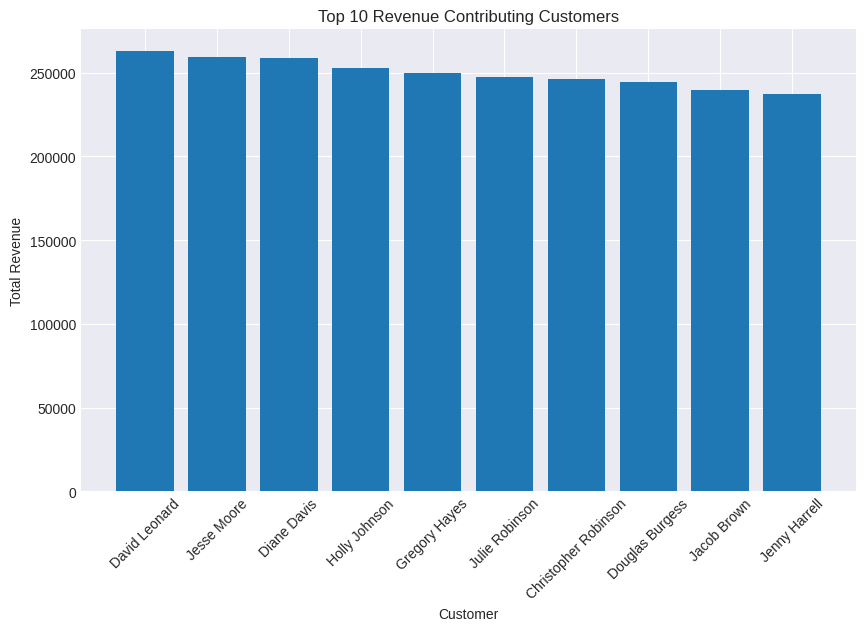

In [ ]:
# Q4.3: Top revenue contributors

# Pick the right customer column
orders_cols = set(orders.columns)
if "customer_id" in orders_cols:
    customer_col = "customer_id"
elif "customer" in orders_cols:
    customer_col = "customer"
else:
    raise ValueError(f"No customer column found in orders. Columns: {orders.columns}")

# Aggregate total revenue per customer
top_revenue_customers = (
    orders
    .group_by(customer_col)
    .agg(pl.col("order_total").sum().alias("total_revenue"))
    .sort("total_revenue", descending=True)
    .limit(10)  # top 10 customers
)

# Join with customers to get customer names
top_revenue_customers_with_names = top_revenue_customers.join(customers, left_on=customer_col, right_on='id', how='left')


print("Top revenue contributing customers:")
print(top_revenue_customers_with_names)

# Optional bar chart
_ax = top_revenue_customers_with_names.to_pandas()
plt.figure(figsize=(10,6))
plt.bar(_ax["name"], _ax["total_revenue"])
plt.title("Top 10 Revenue Contributing Customers")
plt.xlabel("Customer")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

## Question 5: Profitability Deep Dive

The CEO needs a comprehensive profitability analysis:
- Calculate the gross margin for each product (consider supply costs) (Store result in variable: `product_margins`)
- Which products have the highest profit margins? (Store result in variable: `highest_margin_products`)
- What is the relationship between order size and profitability? (Store result in variable: `order_size_profitability`)
- How does profitability vary across different stores? (Store result in variable: `store_profitability`)

In [ ]:
# Q5.1: Calculate gross margin per product (duplicate-safe)

# --- detect join keys ---
prod_cols = set(products.columns)
supp_cols = set(supplies.columns)

if "id" in prod_cols and "product_id" in supp_cols:
    left_key, right_key = "id", "product_id"
elif "sku" in prod_cols and "sku" in supp_cols:
    left_key, right_key = "sku", "sku"
elif "sku" in prod_cols and "product_sku" in supp_cols:
    left_key, right_key = "sku", "product_sku"
elif "name" in prod_cols and "product_name" in supp_cols:
    left_key, right_key = "name", "product_name"
elif "name" in prod_cols and "name" in supp_cols:
    left_key, right_key = "name", "name"
else:
    raise ValueError(f"Couldn't find a common join key.\nproducts: {products.columns}\nsupplies: {supplies.columns}")

# --- detect cost column ---
if "supply_cost" in supp_cols:
    cost_col = "supply_cost"
elif "cost" in supp_cols:
    cost_col = "cost"
elif "unit_cost" in supp_cols:
    cost_col = "unit_cost"
else:
    raise ValueError(f"No cost column found in supplies. Columns: {supplies.columns}")

# ensure numeric
products_ = products.with_columns(pl.col("price").cast(pl.Float64))
supplies_ = supplies.with_columns(pl.col(cost_col).cast(pl.Float64))

# join
products_with_costs = products_.join(supplies_, left_on=left_key, right_on=right_key, how="left")

# compute margins
products_with_costs = products_with_costs.with_columns([
    (pl.col(cost_col).fill_null(0)).alias("_supply_cost"),  # avoid null math
    (pl.col("price") - pl.col(cost_col).fill_null(0)).alias("_gross_profit_per_unit"),
    pl.when(pl.col("price") > 0)
      .then(((pl.col("price") - pl.col(cost_col).fill_null(0)) / pl.col("price")) * 100)
      .otherwise(None)
      .round(2)
      .alias("_gross_margin_pct")
])

# pick a concise set of columns explicitly to avoid duplicates
keep_cols = [c for c in ["id", "sku", "name", "type", "price"] if c in products_with_costs.columns]

product_margins = (
    products_with_costs
    .select(
        keep_cols
        + [pl.col("_supply_cost").alias("supply_cost"),
           pl.col("_gross_profit_per_unit").alias("gross_profit_per_unit"),
           pl.col("_gross_margin_pct").alias("gross_margin_pct")]
    )
    .sort("gross_margin_pct", descending=True)
)

print("Product gross margins (per unit):")
print(product_margins.head(10))




Product gross margins (per unit):
shape: (10, 8)
┌─────────┬─────────┬──────────────┬──────────┬────────┬─────────────┬──────────────┬──────────────┐
│ id      ┆ sku     ┆ name         ┆ type     ┆ price  ┆ supply_cost ┆ gross_profit ┆ gross_margin │
│ ---     ┆ ---     ┆ ---          ┆ ---      ┆ ---    ┆ ---         ┆ _per_unit    ┆ _pct         │
│ str     ┆ str     ┆ str          ┆ str      ┆ f64    ┆ f64         ┆ ---          ┆ ---          │
│         ┆         ┆              ┆          ┆        ┆             ┆ f64          ┆ f64          │
╞═════════╪═════════╪══════════════╪══════════╪════════╪═════════════╪══════════════╪══════════════╡
│ SUP-004 ┆ JAF-004 ┆ flame impala ┆ jaffle   ┆ 1400.0 ┆ 4.0         ┆ 1396.0       ┆ 99.71        │
│ SUP-004 ┆ JAF-003 ┆ the          ┆ jaffle   ┆ 1200.0 ┆ 4.0         ┆ 1196.0       ┆ 99.67        │
│         ┆         ┆ krautback    ┆          ┆        ┆             ┆              ┆              │
│ SUP-004 ┆ JAF-005 ┆ mel-bun      ┆ jaffl

In [ ]:
# Q5.2: Products with highest profit margins
highest_margin_products = (
    product_margins
    .group_by(["sku", "name", "type"])
    .agg([
        pl.col("price").mean().alias("price"),
        pl.col("supply_cost").mean().alias("avg_supply_cost"),
        pl.col("gross_profit_per_unit").mean().alias("gross_profit_per_unit"),
        pl.col("gross_margin_pct").max().alias("gross_margin_pct"),
    ])
    .sort("gross_margin_pct", descending=True)
    .limit(10)
)

print("Highest margin products (top 10):")
print(highest_margin_products)


Highest margin products (top 10):
shape: (10, 7)
┌─────────┬─────────────────┬──────────┬────────┬────────────────┬────────────────┬────────────────┐
│ sku     ┆ name            ┆ type     ┆ price  ┆ avg_supply_cos ┆ gross_profit_p ┆ gross_margin_p │
│ ---     ┆ ---             ┆ ---      ┆ ---    ┆ t              ┆ er_unit        ┆ ct             │
│ str     ┆ str             ┆ str      ┆ f64    ┆ ---            ┆ ---            ┆ ---            │
│         ┆                 ┆          ┆        ┆ f64            ┆ f64            ┆ f64            │
╞═════════╪═════════════════╪══════════╪════════╪════════════════╪════════════════╪════════════════╡
│ JAF-004 ┆ flame impala    ┆ jaffle   ┆ 1400.0 ┆ 38.111111      ┆ 1361.888889    ┆ 99.71          │
│ JAF-003 ┆ the krautback   ┆ jaffle   ┆ 1200.0 ┆ 40.666667      ┆ 1159.333333    ┆ 99.67          │
│ JAF-005 ┆ mel-bun         ┆ jaffle   ┆ 1200.0 ┆ 29.875         ┆ 1170.125       ┆ 99.67          │
│ JAF-002 ┆ doctor stew     ┆ jaffle   ┆ 1

Order size vs profitability (sample):
shape: (10, 4)
┌─────────────────────────────────┬─────────────┬────────────┬────────────────────┐
│ order_id                        ┆ order_total ┆ item_count ┆ order_gross_profit │
│ ---                             ┆ ---         ┆ ---        ┆ ---                │
│ str                             ┆ i64         ┆ i32        ┆ f64                │
╞═════════════════════════════════╪═════════════╪════════════╪════════════════════╡
│ baed0b39-6c8d-4a68-ab51-4af207… ┆ 636         ┆ 1          ┆ 583.6              │
│ e21d5220-882e-46a6-8ae8-b79a5a… ┆ 5512        ┆ 6          ┆ 5049.747222        │
│ ed2e206d-30e0-4eb0-aed1-8222e1… ┆ 530         ┆ 1          ┆ 470.833333         │
│ 9db16248-c20c-4668-b960-b17963… ┆ 742         ┆ 1          ┆ 679.5              │
│ 5150d2d2-7e1c-4665-8464-96995a… ┆ 742         ┆ 1          ┆ 679.5              │
│ 22f31610-d814-4339-90a8-8353c4… ┆ 636         ┆ 1          ┆ 583.6              │
│ f0269f75-f0b5-4ddd-ae

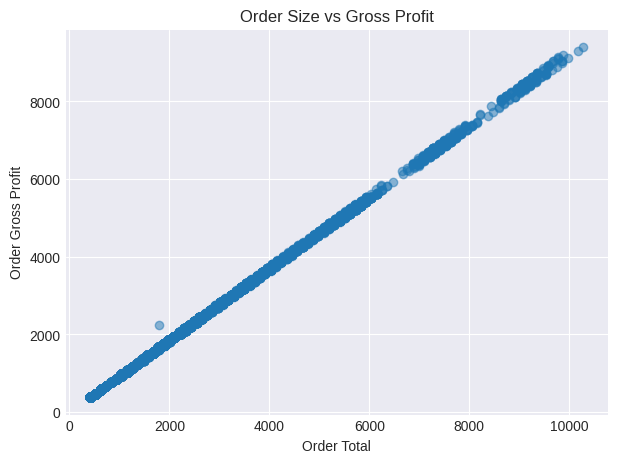

In [ ]:

# Q5.3: Order size vs profitability (quantity-safe)

# --- detect cost column in supplies ---
supp_cols = set(supplies.columns)
if "supply_cost" in supp_cols:
    cost_col = "supply_cost"
elif "cost" in supp_cols:
    cost_col = "cost"
elif "unit_cost" in supp_cols:
    cost_col = "unit_cost"
else:
    raise ValueError(f"No cost column found in supplies. Columns: {supplies.columns}")

# average cost per SKU across suppliers
sku_cost = (
    supplies
    .group_by("sku")
    .agg(pl.col(cost_col).mean().cast(pl.Float64).alias("avg_supply_cost"))
)

# quantity expr (default to 1 if not present)
qty_expr = pl.col("quantity") if "quantity" in items.columns else pl.lit(1)

# bring price & cost onto line items
items_priced = (
    items
    .join(products.select(["sku", "price"]), on="sku", how="left")
    .join(sku_cost, on="sku", how="left")
    .with_columns([
        pl.col("price").cast(pl.Float64),
        pl.col("avg_supply_cost").fill_null(0.0),
        qty_expr.alias("qty")
    ])
    .with_columns(
        ((pl.col("price") - pl.col("avg_supply_cost")) * pl.col("qty"))
        .alias("line_gross_profit")
    )
)

# per-order gross profit & size
order_profit = (
    items_priced
    .group_by("order_id")
    .agg([
        pl.col("line_gross_profit").sum().alias("order_gross_profit"),
        pl.col("qty").sum().alias("item_count")
    ])
)

# join to orders to get order_total (size proxy)
order_size_profitability = (
    order_profit
    .join(orders.select(["id", "order_total"]), left_on="order_id", right_on="id", how="left")
    .select(["order_id", "order_total", "item_count", "order_gross_profit"])
)

print("Order size vs profitability (sample):")
print(order_size_profitability.head(10))

# (optional) correlation + scatter
corr = order_size_profitability.select(
    pl.corr("order_total", "order_gross_profit").alias("pearson_corr")
).item()
print(f"Correlation (order_total vs order_gross_profit): {corr}")

_ax = order_size_profitability.to_pandas()
plt.figure(figsize=(7,5))
plt.scatter(_ax["order_total"], _ax["order_gross_profit"], alpha=0.5)
plt.title("Order Size vs Gross Profit")
plt.xlabel("Order Total")
plt.ylabel("Order Gross Profit")
plt.show()




Store profitability:
shape: (2, 4)
┌──────────────┬───────────────┬────────────────────┬───────────────────┐
│ name         ┆ total_revenue ┆ total_gross_profit ┆ profit_margin_pct │
│ ---          ┆ ---           ┆ ---                ┆ ---               │
│ str          ┆ i64           ┆ f64                ┆ f64               │
╞══════════════╪═══════════════╪════════════════════╪═══════════════════╡
│ Brooklyn     ┆ 22822628      ┆ 2.1180e7           ┆ 92.8              │
│ Philadelphia ┆ 43215565      ┆ 3.9363e7           ┆ 91.08             │
└──────────────┴───────────────┴────────────────────┴───────────────────┘


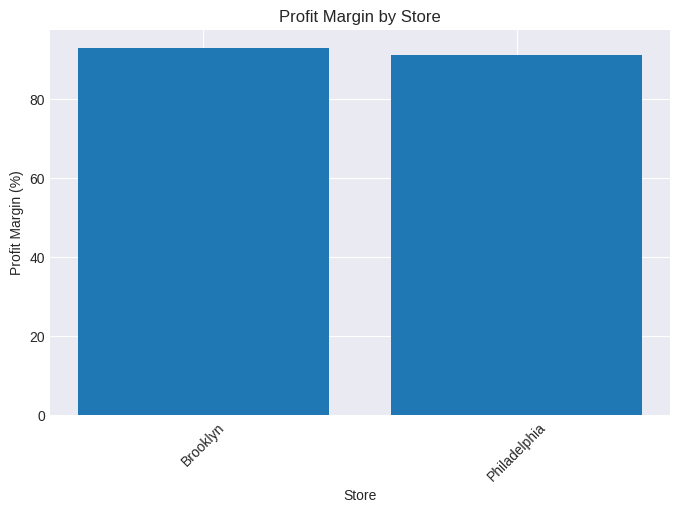

In [ ]:

# Q5.4: Profitability by store

# attach store_id to each order's profit/total
order_profit_with_store = (
    order_size_profitability
    .join(orders.select(["id", "store_id"]), left_on="order_id", right_on="id", how="left")
)

# aggregate to store-level and compute margin
store_profitability = (
    order_profit_with_store
    .group_by("store_id")
    .agg([
        pl.col("order_total").sum().alias("total_revenue"),
        pl.col("order_gross_profit").sum().alias("total_gross_profit"),
    ])
    .with_columns(
        (pl.col("total_gross_profit") / pl.col("total_revenue") * 100)
        .round(2)
        .alias("profit_margin_pct")
    )
    .join(stores.select(["id", "name"]), left_on="store_id", right_on="id", how="left")
    .select(["name", "total_revenue", "total_gross_profit", "profit_margin_pct"])
    .sort("profit_margin_pct", descending=True)
)

print("Store profitability:")
print(store_profitability)

# optional chart
_ax = store_profitability.to_pandas()
plt.figure(figsize=(8,5))
plt.bar(_ax["name"], _ax["profit_margin_pct"])
plt.title("Profit Margin by Store")
plt.xlabel("Store")
plt.ylabel("Profit Margin (%)")
plt.xticks(rotation=45)
plt.show()



## Question 6: Business Optimization Recommendations

Based on your analysis, provide three specific, data-driven recommendations to improve business performance. Support each recommendation with relevant metrics and visualizations.

### Recommendation 1:
[Write your first recommendation here]

  Focus on selling the beverages more than the sandwiches. Stores make 63.52% of their revenue from beverages and they cost stores 3.8% of the amount of revenue they produce.


Revenue by Product Type (Beverages vs Jaffles):
shape: (2, 3)
┌──────────┬───────────────┬─────────────────────────────┐
│ type     ┆ total_revenue ┆ percentage_of_total_revenue │
│ ---      ┆ ---           ┆ ---                         │
│ str      ┆ f64           ┆ f64                         │
╞══════════╪═══════════════╪═════════════════════════════╡
│ beverage ┆ 3.98362e7     ┆ 63.52                       │
│ jaffle   ┆ 2.28809e7     ┆ 36.48                       │
└──────────┴───────────────┴─────────────────────────────┘


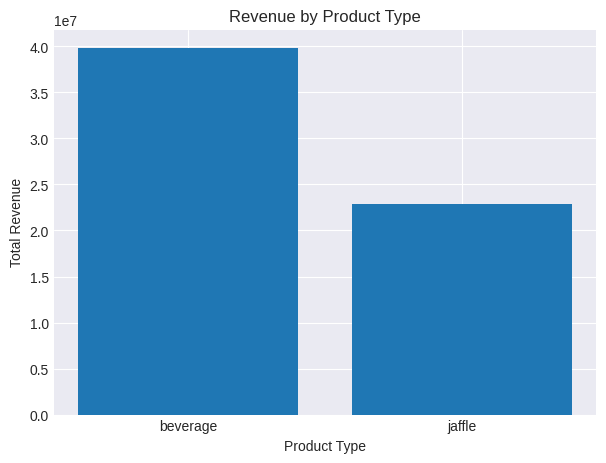


Revenue vs Cost by Product Type:
shape: (2, 3)
┌──────────┬───────────────┬──────────────┐
│ type     ┆ total_revenue ┆ total_cost   │
│ ---      ┆ ---           ┆ ---          │
│ str      ┆ f64           ┆ f64          │
╞══════════╪═══════════════╪══════════════╡
│ jaffle   ┆ 2.28809e7     ┆ 617570.52381 │
│ beverage ┆ 3.98362e7     ┆ 1.5573e6     │
└──────────┴───────────────┴──────────────┘


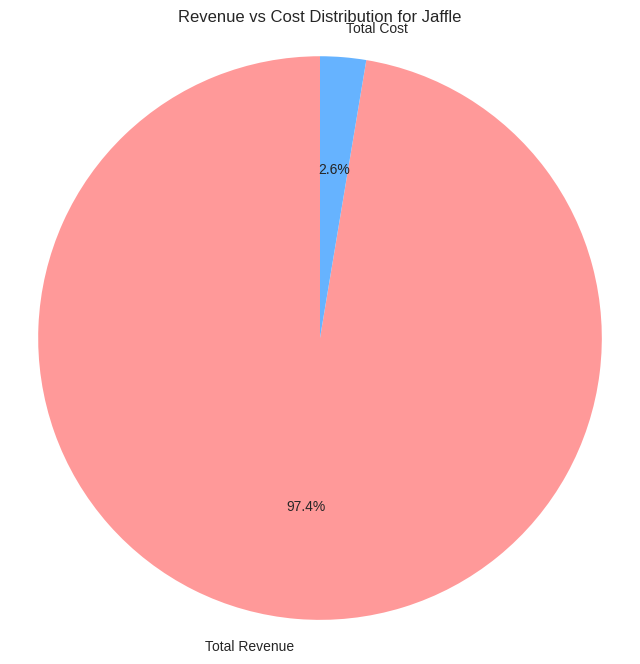

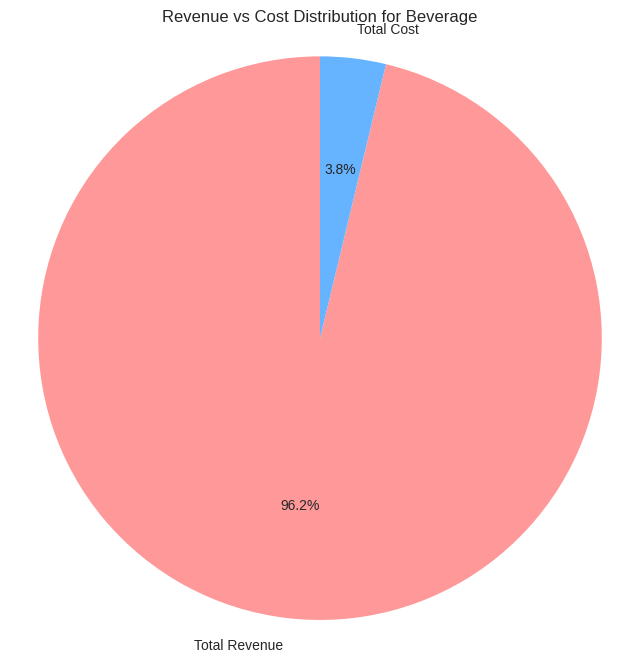

In [ ]:

# Supporting analysis for Recommendation 1
# Your code here

# Analysis 3: Revenue comparison of beverages vs jaffles

# quantity expr (default to 1 if not present)
qty_expr_analysis_3 = pl.col("quantity") if "quantity" in items_with_products.columns else pl.lit(1)

revenue_by_type = (
    items_with_products
    .with_columns(
        (pl.col("price").cast(pl.Float64) * qty_expr_analysis_3.fill_null(1)).alias("line_revenue")
    )
    .group_by("type")
    .agg(pl.col("line_revenue").sum().alias("total_revenue"))
    .with_columns(
        (pl.col("total_revenue") / pl.col("total_revenue").sum() * 100).round(2).alias("percentage_of_total_revenue")
    )
    .sort("total_revenue", descending=True)
)

print("\nRevenue by Product Type (Beverages vs Jaffles):")
print(revenue_by_type)

# Bar chart for revenue by product type
_ax = revenue_by_type.to_pandas()
plt.figure(figsize=(7, 5))
plt.bar(_ax["type"], _ax["total_revenue"])
plt.title("Revenue by Product Type")
plt.xlabel("Product Type")
plt.ylabel("Total Revenue")
plt.show()

# Analysis 4: Revenue by product type vs cost by product type

# quantity expr for analysis 4 (default to 1 if not present)
qty_expr_analysis_4 = pl.col("quantity") if "quantity" in items.columns else pl.lit(1)

# Calculate revenue per item including product type
revenue_per_item_with_type = items.join(products.select(["sku", "type", "price"]), on="sku", how="left").with_columns(
    (pl.col("price").cast(pl.Float64) * qty_expr_analysis_4.fill_null(1)).alias("line_revenue")
).select(["type", "line_revenue"])

# Calculate cost per item including product type
# --- detect cost column in supplies ---
supp_cols = set(supplies.columns)
if "supply_cost" in supp_cols:
    cost_col = "supply_cost"
elif "cost" in supp_cols:
    cost_col = "cost"
elif "unit_cost" in supp_cols:
    cost_col = "unit_cost"
else:
    raise ValueError(f"No cost column found in supplies. Columns: {supplies.columns}")

# average cost per SKU across suppliers
sku_cost = (
    supplies
    .group_by("sku")
    .agg(pl.col(cost_col).mean().cast(pl.Float64).alias("avg_supply_cost"))
)

cost_per_item_with_type = items.join(products.select(["sku", "type"]), on="sku", how="left").join(sku_cost, on="sku", how="left").with_columns(
    (pl.col("avg_supply_cost").fill_null(0.0) * qty_expr_analysis_4.fill_null(1)).alias("line_cost")
).select(["type", "line_cost"])


# Group by product type and sum revenue and cost
revenue_cost_by_type = revenue_per_item_with_type.group_by("type").agg(pl.col("line_revenue").sum().alias("total_revenue")).join(
    cost_per_item_with_type.group_by("type").agg(pl.col("line_cost").sum().alias("total_cost")), on="type", how="left"
)

print("\nRevenue vs Cost by Product Type:")
print(revenue_cost_by_type)

# Pie charts for revenue vs cost by product type
_ax = revenue_cost_by_type.to_pandas()

for product_type in _ax["type"].unique():
    type_data = _ax[_ax["type"] == product_type]
    labels = ['Total Revenue', 'Total Cost']
    sizes = [type_data['total_revenue'].iloc[0], type_data['total_cost'].iloc[0]]
    colors = ['#ff9999','#66b3ff']
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(f'Revenue vs Cost Distribution for {product_type.capitalize()}')
    plt.show()

### Recommendation 2:
[Write your second recommendation here]
Market to repeat customers to help improve poor store performance on weekends.


Store Performance by Day of the Week:
shape: (14, 4)
┌─────────────────────────────────┬─────────┬───────────────┬──────────────┐
│ store_id                        ┆ weekday ┆ daily_revenue ┆ name         │
│ ---                             ┆ ---     ┆ ---           ┆ ---          │
│ str                             ┆ i8      ┆ i64           ┆ str          │
╞═════════════════════════════════╪═════════╪═══════════════╪══════════════╡
│ a2a24e87-dec8-4f5d-9c9e-0e9849… ┆ 1       ┆ 3732965       ┆ Brooklyn     │
│ a2a24e87-dec8-4f5d-9c9e-0e9849… ┆ 2       ┆ 3875653       ┆ Brooklyn     │
│ a2a24e87-dec8-4f5d-9c9e-0e9849… ┆ 3       ┆ 3816473       ┆ Brooklyn     │
│ a2a24e87-dec8-4f5d-9c9e-0e9849… ┆ 4       ┆ 3631359       ┆ Brooklyn     │
│ a2a24e87-dec8-4f5d-9c9e-0e9849… ┆ 5       ┆ 3729739       ┆ Brooklyn     │
│ …                               ┆ …       ┆ …             ┆ …            │
│ a9128331-08d7-41a2-b615-21283e… ┆ 3       ┆ 7018096       ┆ Philadelphia │
│ a9128331-08d7-41a2-b

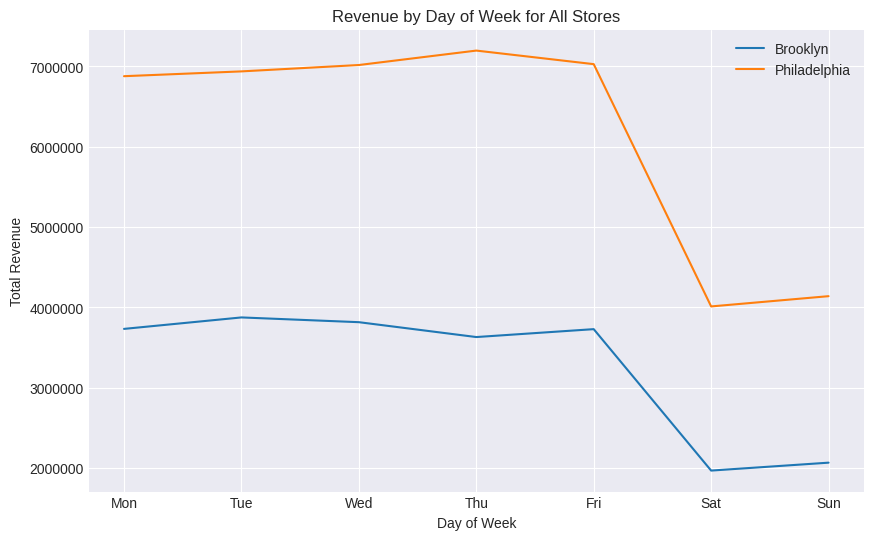


Customer Retention Analysis by Store:
shape: (4, 3)
┌──────────────┬───────────────┬────────────────┐
│ name         ┆ customer_type ┆ customer_count │
│ ---          ┆ ---           ┆ ---            │
│ str          ┆ str           ┆ u32            │
╞══════════════╪═══════════════╪════════════════╡
│ Brooklyn     ┆ One-time      ┆ 8              │
│ Brooklyn     ┆ Repeat        ┆ 482            │
│ Philadelphia ┆ One-time      ┆ 2              │
│ Philadelphia ┆ Repeat        ┆ 438            │
└──────────────┴───────────────┴────────────────┘


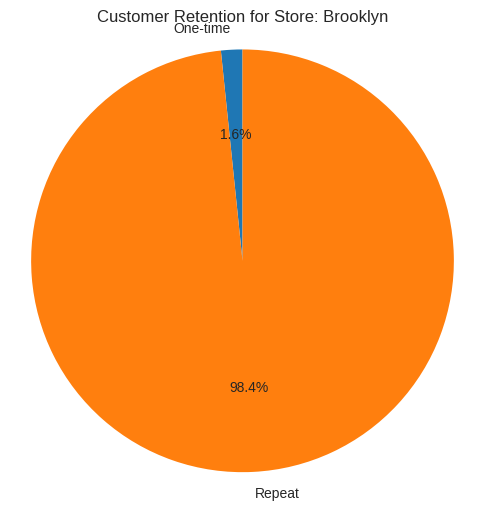

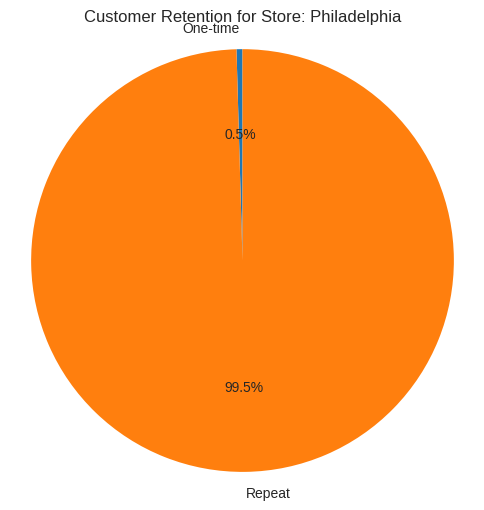


Revenue by Day Type (Weekday vs Weekend):
shape: (2, 2)
┌──────────┬───────────────┐
│ day_type ┆ total_revenue │
│ ---      ┆ ---           │
│ str      ┆ i64           │
╞══════════╪═══════════════╡
│ Weekday  ┆ 53848905      │
│ Weekend  ┆ 12189288      │
└──────────┴───────────────┘


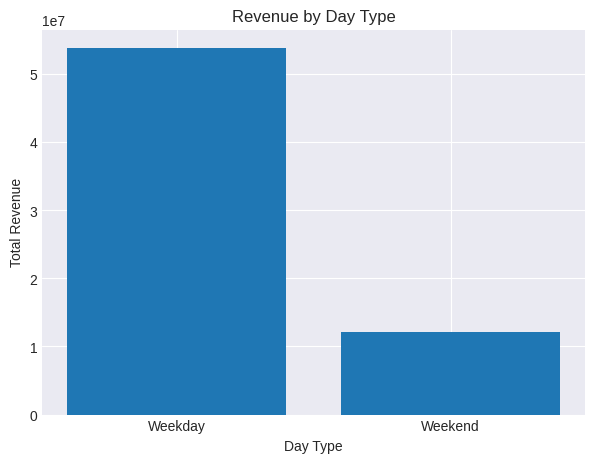

In [ ]:
# Supporting analysis for Recommendation 2
# Your code here

# Performance of each store by day of the week
store_performance_by_day = (
    orders
    .with_columns(pl.col('ordered_at').cast(pl.Datetime))
    .group_by(['store_id', pl.col('ordered_at').dt.weekday().alias('weekday')])
    .agg(pl.col('order_total').sum().alias('daily_revenue'))
    .sort(['store_id', 'weekday'])
)

# Join with stores to get store names (cities)
store_performance_by_day_with_names = store_performance_by_day.join(stores.select(['id', 'name']), left_on='store_id', right_on='id', how='left')

print("\nStore Performance by Day of the Week:")
print(store_performance_by_day_with_names)

# Optional: Visualize store performance by day of the week
_ax = store_performance_by_day_with_names.to_pandas()
stores_list = _ax['store_id'].unique()

plt.figure(figsize=(10, 6))

for store_id in stores_list:
    store_data = _ax[_ax['store_id'] == store_id]
    store_name = store_data['name'].iloc[0] # Get the store name
    plt.plot(store_data['weekday'], store_data['daily_revenue'], label=store_name)


plt.title('Revenue by Day of Week for All Stores')
plt.xlabel('Day of Week')
plt.ylabel('Total Revenue')
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.show()



# Customer retention analysis by store
# Pick the right customer column
orders_cols = set(orders.columns)
if "customer_id" in orders_cols:
    customer_col = "customer_id"
elif "customer" in orders_cols:
    customer_col = "customer"
else:
    raise ValueError(f"No customer column found in orders. Columns: {orders.columns}")

# orders per customer per store
customer_order_counts_by_store = (
    orders
    .group_by(['store_id', customer_col])
    .agg(pl.len().alias('order_count'))
)

# Classify customers as repeat or one-time within each store
customer_type_by_store = customer_order_counts_by_store.with_columns(
    pl.when(pl.col('order_count') > 1)
    .then(pl.lit('Repeat'))
    .otherwise(pl.lit('One-time'))
    .alias('customer_type')
)

# Join with stores to get store names
customer_type_by_store_with_names = customer_type_by_store.join(stores.select(['id', 'name']), left_on='store_id', right_on='id', how='left')

# Count number of repeat and one-time customers per store
retention_summary_by_store = (
    customer_type_by_store_with_names
    .group_by(['name', 'customer_type'])
    .agg(pl.len().alias('customer_count'))
    .sort(['name', 'customer_type'])
)

print("\nCustomer Retention Analysis by Store:")
print(retention_summary_by_store)

# Optional: Pie charts for customer retention by store
_ax = retention_summary_by_store.to_pandas()
stores_list = _ax['name'].unique()


for store_name in stores_list:
    store_data = _ax[_ax['name'] == store_name]
    plt.figure(figsize=(6, 6))
    plt.pie(store_data['customer_count'], labels=store_data['customer_type'], autopct='%1.1f%%', startangle=90)
    plt.title(f'Customer Retention for Store: {store_name}')
    plt.axis('equal')
    plt.show()

# Analysis: Revenue of Monday-Friday vs Saturday-Sunday
revenue_by_day_type = (
    orders
    .with_columns(pl.col('ordered_at').cast(pl.Datetime))
    .with_columns(
        pl.when(pl.col('ordered_at').dt.weekday().is_in([1, 2, 3, 4, 5]))
        .then(pl.lit('Weekday'))
        .otherwise(pl.lit('Weekend'))
        .alias('day_type')
    )
    .group_by('day_type')
    .agg(pl.col('order_total').sum().alias('total_revenue'))
)

print("\nRevenue by Day Type (Weekday vs Weekend):")
print(revenue_by_day_type)

# Bar chart for revenue by day type
_ax = revenue_by_day_type.to_pandas()
plt.figure(figsize=(7, 5))
plt.bar(_ax["day_type"], _ax["total_revenue"])
plt.title('Revenue by Day Type')
plt.xlabel('Day Type')
plt.ylabel('Total Revenue')
plt.show()

### Recommendation 3:
[Write your third recommendation here]
Decrease product variety in offerings, in order to maximize potential revenue

Total Item Quantity Sold vs Total Revenue per Item:
shape: (10, 4)
┌─────────┬─────────────────────────┬─────────────────────┬───────────────┐
│ sku     ┆ name                    ┆ total_quantity_sold ┆ total_revenue │
│ ---     ┆ ---                     ┆ ---                 ┆ ---           │
│ str     ┆ str                     ┆ i32                 ┆ f64           │
╞═════════╪═════════════════════════╪═════════════════════╪═══════════════╡
│ BEV-004 ┆ for richer or pourover  ┆ 14217               ┆ 9.9519e6      │
│ BEV-001 ┆ tangaroo                ┆ 14371               ┆ 8.6226e6      │
│ BEV-003 ┆ vanilla ice             ┆ 14099               ┆ 8.4594e6      │
│ BEV-002 ┆ chai and mighty         ┆ 14359               ┆ 7.1795e6      │
│ BEV-005 ┆ adele-ade               ┆ 14057               ┆ 5.6228e6      │
│ JAF-004 ┆ flame impala            ┆ 3744                ┆ 5.2416e6      │
│ JAF-003 ┆ the krautback           ┆ 3862                ┆ 4.6344e6      │
│ JAF-005 ┆ mel-bun  

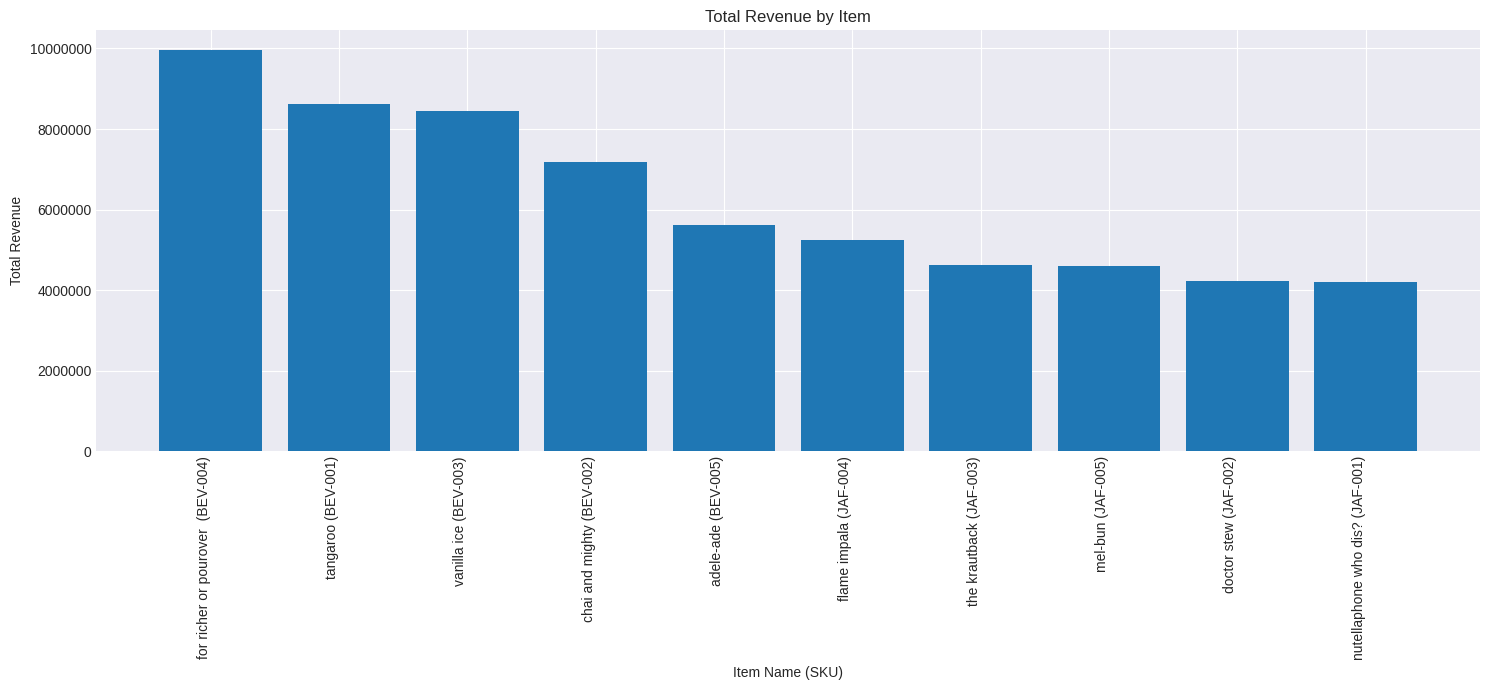

In [ ]:
# Supporting analysis for Recommendation 3
# Your code here

# Analysis: Total item quantity vs revenue per item
# Join items with products to get product information and price
# Use the quantity expression (default to 1 if not present)
qty_expr = pl.col("quantity") if "quantity" in items.columns else pl.lit(1)

items_with_price = items.join(products.select(["sku", "price"]), on="sku", how="left")


items_with_revenue = items_with_price.with_columns(
    (pl.col("sku")).alias("item_sku"), # Rename for clarity before join
    (pl.col("price").cast(pl.Float64) * qty_expr.fill_null(1)).alias("line_revenue")
).select(["item_sku", "line_revenue", qty_expr.alias("quantity_sold")])


# Group by item (sku) to get total quantity and total revenue per item from sold items
sold_item_aggregations = (
    items_with_revenue
    .group_by("item_sku")
    .agg([
        pl.col("quantity_sold").sum().alias("total_quantity_sold"),
        pl.col("line_revenue").sum().alias("total_revenue")
    ])
)


# Start with all products and left join the sold item aggregations
# This ensures all products are included, even those not sold
item_revenue_and_quantity = (
    products.select(["sku", "name"])
    .join(sold_item_aggregations, left_on="sku", right_on="item_sku", how="left")
    .fill_null(0) # Fill nulls for items not sold
    .sort("total_revenue", descending=True)
)


print("Total Item Quantity Sold vs Total Revenue per Item:")
print(item_revenue_and_quantity)

# Chart of all highest revenue items
_ax = item_revenue_and_quantity.to_pandas()

# Create combined name and SKU for labels
_ax['item_label'] = _ax['name'] + ' (' + _ax['sku'] + ')'

plt.figure(figsize=(15, 7)) # Increased figure size for more items
plt.bar(_ax["item_label"], _ax["total_revenue"])
plt.title("Total Revenue by Item")
plt.xlabel("Item Name (SKU)")
plt.ylabel("Total Revenue")
plt.xticks(rotation=90, ha='right') # Rotate labels for readability
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

## Executive Summary

[Write your executive summary here - up to 1 page when printed]

### Key Findings:
1. **In total, the sandwich shop has a customer retainment rate of 98.92%.** This date could be leveraged to improve issues with order rates dropping over the weekend, as a sign to increase marketing efforts.
2. **Beverages are 63.52% of their total revenue.** For an item to make up 63.52% of your revenue, and it only costs you 3.8% of its revenue is truly increadible.
3. **The distrubution of their products in each of their lines sold is relatively even.** This shows that about the same amount of people buy x sandwich vs the amount of people that buy y sandwich (same deal for the beverages).

### Strategic Recommendations (via the 'Strategic Recommendations' section above):
1. **"Focus on selling the beverages more than the sandwiches. Stores make 63.52% of their revenue from beverages and they cost stores 3.8% of the amount of revenue they produce."**
2. **"Market to repeat customers to help improve poor store performance on weekends."** Although weekdays have 2.5x more days than weekends, the weekends account for $23,375,685 less revenue. With an already high customer retainment rate, the store should improve their marketing to gain more of those customers coming in on the weekends too.
3. **"Decrease product variety in offerings, in order to maximize potential revenue"** With the distrubution of item sales being relatively even in each product line, the stores could potentially trim items from each product line to reduce costs and hopefully funnel more revenue towards the highest performing items.